In [140]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [305]:
#import dependencies
import pandas as pd
import re

import nltk
nltk.download('stopwords'); from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize 
nltk.download('punkt'); nltk.download('averaged_perceptron_tagger');nltk.download('wordnet')
   
from nltk.stem import WordNetLemmatizer    
    
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint as sp_randint
# from time import time

# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import SelectFromModel
# from sklearn.metrics import classification_report
# from sklearn.svm import LinearSVC

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to /Users/Stef/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Stef/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Stef/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Stef/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [315]:
tweets = pd.read_csv("tweet_data.csv")
display(
    tweets.head(5),
    "The shape of the dataset: {}" .format(tweets.shape)
)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


'The shape of the dataset: (24783, 7)'

In [316]:
#drop useless column
tweets.drop("Unnamed: 0", axis=1, inplace=True)

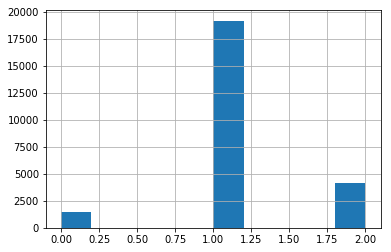

In [204]:
#visualize class
tweets['class'].hist()

In [317]:
#set stopwords
stop = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stop.extend(other_exclusions)

In [318]:
#define function to clean tweets
def  clean_text(tweets, text_field):
    tweets["tweet"] = tweets["tweet"].str.lower()
    tweets["tweet"] = tweets["tweet"].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|rt|amp|\d+", "", elem)) 
    tweets["tweet"] = tweets["tweet"].apply(lambda elem: re.sub(r'\s+|\s+[a-zA-Z]\s+',' ', elem))
    return tweets

In [319]:
#clean tweets
tweet_clean = clean_text(tweets, "tweet")
tweet_clean["tweet"][0]

' as a woman you shouldnt complain about cleaning up your house as a man you should always take the trash out'

In [353]:
tagged = []
for j in tweet_clean["tweet"][0]:
    tokenized = sent_tokenize(j) 
    for i in tokenized: 

        # Word tokenizers is used to find the words  
        # and punctuation in a string 
        wordsList = nltk.word_tokenize(i) 

        # removing stop words from wordList 
        #wordsList = [w for w in wordsList if not w in stop_words]  

        #  Using a Tagger. Which is part-of-speech  
        # tagger or POS-tagger.  
        tagged.append(nltk.pos_tag(wordsList)) 

tagged

[[('a', 'DT')],
 [('s', 'NN')],
 [('a', 'DT')],
 [('w', 'NN')],
 [('o', 'NN')],
 [('m', 'NN')],
 [('a', 'DT')],
 [('n', 'NN')],
 [('y', 'NN')],
 [('o', 'NN')],
 [('u', 'NN')],
 [('s', 'NN')],
 [('h', 'NN')],
 [('o', 'NN')],
 [('u', 'NN')],
 [('l', 'NN')],
 [('d', 'NN')],
 [('n', 'NN')],
 [('t', 'NN')],
 [('c', 'NNS')],
 [('o', 'NN')],
 [('m', 'NN')],
 [('p', 'NN')],
 [('l', 'NN')],
 [('a', 'DT')],
 [('i', 'NN')],
 [('n', 'NN')],
 [('a', 'DT')],
 [('b', 'NN')],
 [('o', 'NN')],
 [('u', 'NN')],
 [('t', 'NN')],
 [('c', 'NNS')],
 [('l', 'NN')],
 [('e', 'NN')],
 [('a', 'DT')],
 [('n', 'NN')],
 [('i', 'NN')],
 [('n', 'NN')],
 [('g', 'NN')],
 [('u', 'NN')],
 [('p', 'NN')],
 [('y', 'NN')],
 [('o', 'NN')],
 [('u', 'NN')],
 [('r', 'NN')],
 [('h', 'NN')],
 [('o', 'NN')],
 [('u', 'NN')],
 [('s', 'NN')],
 [('e', 'NN')],
 [('a', 'DT')],
 [('s', 'NN')],
 [('a', 'DT')],
 [('m', 'NN')],
 [('a', 'DT')],
 [('n', 'NN')],
 [('y', 'NN')],
 [('o', 'NN')],
 [('u', 'NN')],
 [('s', 'NN')],
 [('h', 'NN')],
 [('o'

In [340]:
#define X and y
X = tweet_clean['tweet']
y = tweet_clean['class'].astype(int)

In [321]:
#lemmatize the text
X = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in X]
X[0]

' as a woman you shouldnt complain about cleaning up your house as a man you should always take the trash out'

In [341]:
# #lemmatize like Fadia
# stemmer = WordNetLemmatizer()
# X = [stemmer.lemmatize(word) for word in X]
# X

[' as a woman you shouldnt complain about cleaning up your house as a man you should always take the trash out',
 ' boy dats coldtyga dwn bad for cuffin dat hoe in the st place',
 ' dawg you ever fuck a bitch and she sta to cry you be confused as shit',
 ' ganderson based she look like a tranny',
 ' the shit you hear about me might be true or it might be faker than the bitch who told it to ya ',
 'madisonx the shit just blows meclaim you so faithful and down for somebody but still fucking with hoes ',
 'brighterdays i can not just sit up and hate on another bitch i got too much shit going on',
 ' cause im tired of you big bitches coming for us skinny girls',
 ' you might not get ya bitch back thats that ',
 ' hobbies include fighting mariambitch',
 ' keeks is a bitch she curves everyone lol i walked into a conversation like this smh',
 ' murda gang bitch its gang land ',
 ' so hoes that smoke are losers yea go on ig',
 ' bad bitches is the only thing that i like ',
 ' bitch get up off 

In [346]:
#create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CREATE SGDClassifier model

In [307]:
#create a sci-kit learn pipeline with a SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer(max_features=1500, stop_words=stop)),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),
])

In [308]:
#fit data in model and predict
model = pipeline_sgd.fit(X_train, y_train)
y_pred = model.predict(X_test)

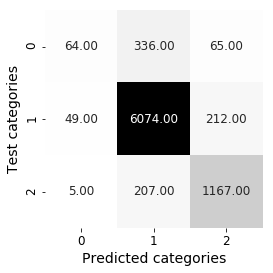

In [271]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'Test categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [309]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.14      0.22       465
           1       0.92      0.96      0.94      6335
           2       0.81      0.85      0.83      1379

   micro avg       0.89      0.89      0.89      8179
   macro avg       0.76      0.65      0.66      8179
weighted avg       0.88      0.89      0.88      8179

0.8933854994498105


CREATE RANDOM FOREST model

In [349]:
#create a sci-kit learn pipeline with a Random Forest
pipeline_randomF = Pipeline([
    ('vect', CountVectorizer(max_features=1500, stop_words=stop)),
    ('tfidf',  TfidfTransformer()),
    ('nb', RandomForestClassifier(n_estimators=150, random_state=42)),
])

In [350]:
#create model
model = pipeline_randomF.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

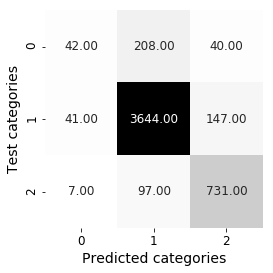

In [351]:
#visualize results
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'Test categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [352]:
#reports
print(classification_report(y_test,y_pred))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.14      0.22       290
           1       0.92      0.95      0.94      3832
           2       0.80      0.88      0.83       835

   micro avg       0.89      0.89      0.89      4957
   macro avg       0.73      0.66      0.66      4957
weighted avg       0.87      0.89      0.88      4957

0.9925854937960255
0.8910631430300585


TEST THE MODEL! TYPE YOUR OWN TWEET!

In [302]:
test = str(input("Your tweet : "))
def result(test):
    if model.predict([test])[0] == 0: print("Result = 0: your tweet is hateful - fuck you"),
    elif model.predict([test])[0] == 1: print("Result = 1: your tweet is offensive - get a life you jerk"),
    elif model.predict([test])[0] == 2: print("Result = 2: your tweet is neither hateful nor offensive... but i'm watching you!")
result(test)

Your tweet :  Yo momma is so fat, I took a picture of her last Christmas and it's still printing


Result = 1: your tweet is offensive - get a life you jerk
